sign-language-mnist : https://www.kaggle.com/datasets/grassknoted/asl-alphabet/data?select=asl_alphabet_train

chatbot dataset :  https://www.kaggle.com/datasets/kreeshrajani/3k-conversations-dataset-for-chatbot

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# code to connect to google drive

#from google.colab import drive
#drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read the data

In [4]:
# Define the directory containing your data
data_dir = 'asl_alphabet_train'

# Initialize a list to store the data
data = []

# Loop through each folder and file in the directory
for label in os.listdir(data_dir):
    if os.path.isdir(os.path.join(data_dir, label)):  # Check if it's a directory
        for image in os.listdir(os.path.join(data_dir, label)):
            image_path = os.path.join(data_dir, label, image)
            data.append([image_path, label])

# Create a DataFrame
asl_train_df = pd.DataFrame(data, columns=['image_path', 'label'])

# Show the first few rows of the DataFrame
asl_train_df.head()


,image_path,label
0,asl_alphabet_train/R/R2837.jpg,R
1,asl_alphabet_train/R/R2189.jpg,R
2,asl_alphabet_train/R/R1480.jpg,R
3,asl_alphabet_train/R/R1494.jpg,R
4,asl_alphabet_train/R/R2823.jpg,R


In [5]:
asl_train_df.shape

(87000, 2)

In [7]:
asl_train_df['label'].value_counts()

label
R          3000
M          3000
P          3000
Y          3000
L          3000
K          3000
B          3000
E          3000
X          3000
Q          3000
V          3000
D          3000
C          3000
J          3000
space      3000
U          3000
nothing    3000
del        3000
H          3000
O          3000
F          3000
A          3000
S          3000
T          3000
Z          3000
G          3000
N          3000
I          3000
W          3000
Name: count, dtype: int64

# Quick EDA

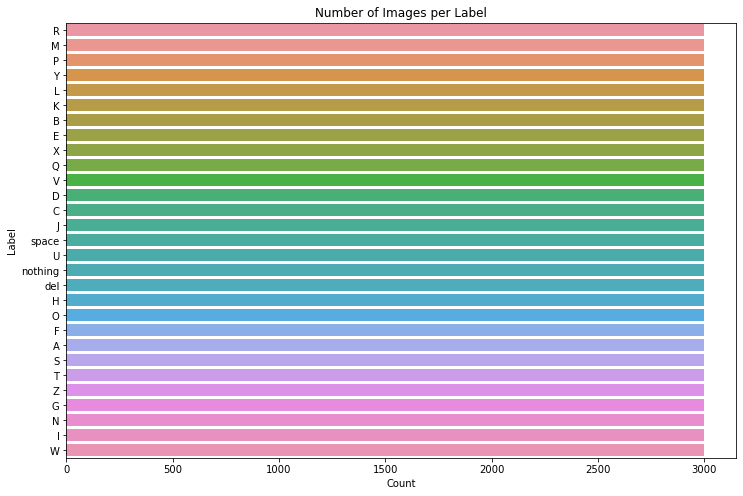

In [6]:
import seaborn as sns
# Plotting
plt.figure(figsize=(12, 8))  # Set the figure size
sns.countplot(y='label', data=asl_train_df, order = asl_train_df['label'].value_counts().index)  # Create a countplot
plt.title('Number of Images per Label')  # Set title
plt.xlabel('Count')  # Set x-axis label
plt.ylabel('Label')  # Set y-axis label
plt.show()  # Show the plot

### Feature Extraction ( Using Mean Pixel Intensity & Standard Deviation)

In [8]:
from PIL import Image
import numpy as np
import pandas as pd

# Define a function to extract mean intensity from an image
def extract_mean_intensity(image_path):
    image = Image.open(image_path)
    image = image.convert('L')  # Convert to grayscale
    array = np.array(image)
    return np.mean(array)

# Define a function to extract standard deviation of intensity from an image
def extract_std_deviation(image_path):
    image = Image.open(image_path)
    image = image.convert('L')  # Convert to grayscale
    array = np.array(image)
    return np.std(array)


# Apply feature extraction to each image in the DataFrame
asl_train_df['mean_intensity'] = asl_train_df['image_path'].apply(extract_mean_intensity)
asl_train_df['std_deviation'] = asl_train_df['image_path'].apply(extract_std_deviation)


## Correlation Matrix plot between Brightness and Contrast

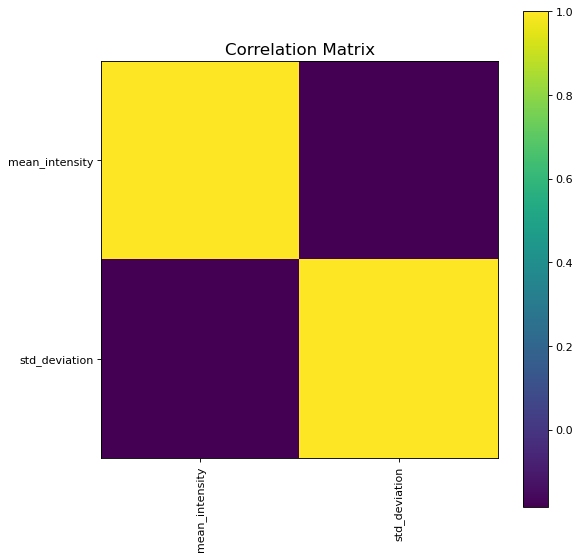

In [9]:
import matplotlib.pyplot as plt

def plotCorrelationMatrix(df, graphWidth):
    df_numeric = df.select_dtypes(include=[np.number])  # Select only numeric columns
    if df_numeric.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df_numeric.shape[1]}) is less than 2')
        return
    corr = df_numeric.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix', fontsize=15)
    plt.show()

# Plot the correlation matrix
plotCorrelationMatrix(asl_train_df, graphWidth=8)


In image processing and analysis, feature extraction such as mean pixel intensity and standard deviation is crucial for distilling complex image data into more interpretable, numerical forms. 

Mean pixel intensity provides a measure of the overall brightness or luminance of an image, which can be critical for tasks that involve brightness normalization or thresholding. 

Standard deviation, on the other hand, measures the variability or contrast within the pixel values, offering insights into the texture and detail present in the image. 

The correlation matrix plot, showing a negative correlation between these two features, suggests that images with higher average brightness tend to have less contrast and variability in their pixel values. Understanding this relationship helps in optimizing image processing tasks and improving algorithms for tasks like image classification, where consistent image quality can influence performance.


## Scatter and Density Plot

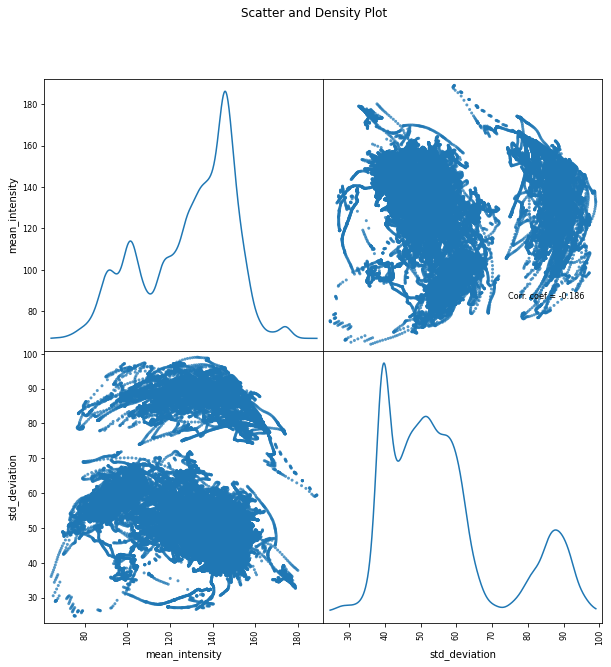

In [11]:
import matplotlib.pyplot as plt

def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])  # Keep only numerical columns
    df = df.dropna(axis=1)  # Drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]]  # Keep columns with more than 1 unique value
    columnNames = list(df)
    if len(columnNames) > 10:  # Limit the number of columns to prevent overcrowding
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate(f'Corr. coef = {corrs[i, j]:.3f}', (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

# Call the function to plot
plotScatterMatrix(asl_train_df, plotSize=10, textSize=8)


The scatter and density plot generated from ASL alphabet image dataset provides crucial insights into the relationships between mean intensity and standard deviation of pixel values. 

The density plots indicate predominant brightness levels and variability in image contrast, which are important for understanding image characteristics. 

The scatter plot reveals a slight positive correlation between mean intensity and standard deviation, suggesting these features are somewhat related but still provide independent information. 

This visualization is essential for guiding feature selection and engineering in machine learning models aimed at classifying ASL signs. Overall, it helps ensure that models are trained on informative, non-redundant features, potentially enhancing classification accuracy.